# Times job Analysis
 * Sentiment Analysis for Fake job Vs Real Job
 * Prediction of Model usong Naive Bayes and RNN

In [202]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import sent_tokenize, word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
import re
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation,LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import *
from tensorflow.keras.layers import Embedding,SpatialDropout1D

In [203]:
times=pd.read_excel(r"C:\Users\TRUPTI\Desktop\Trupti_CP_2\TimesJobFileData.xlsx")
times.head()

,Unnamed: 0,Title,Company,Experience,Salary,Location,Posted Date,Keyskills,Description,URL
0,0,\n Ophthalmology - Senior Resident & Assi...,\n Rachana Corporate Services Pvt.Ltd\n ...,0 - 3 yrs,₹Rs 15.00 - 18.00 Lacs p.a.,Other City(s) in Uttar Pradesh,2024-01-03,Ophthalmologist,Consulting with patients to understand their h...,https://www.timesjobs.com/job-detail/ophthalmo...
1,1,\n CANADA Project Required HVAC Engineer,\n IRANIAN CONSTRUCTION GROUP\n (More J...,7 - 12 yrs,₹Rs 18.00 - 27.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,HVAC Engineer,"To support our rapid growth, CoolSys Energy De...",https://www.timesjobs.com/job-detail/canada-pr...
2,2,\n CANADA Project Required Senior Project...,\n IRANIAN CONSTRUCTION GROUP\n (More J...,12 - 17 yrs,₹Rs 26.00 - 33.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,Project Engineer,Minimum Requirements:8 years of progressive ex...,https://www.timesjobs.com/job-detail/canada-pr...
3,3,\n CANADA Project Required Senior Architect,\n IRANIAN CONSTRUCTION GROUP\n (More J...,7 - 12 yrs,₹Rs 18.00 - 28.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,Senior Architect,Job DescriptionSenior Architect To lead the de...,https://www.timesjobs.com/job-detail/canada-pr...
4,4,\n CANADA Project Required Plant Engineer,\n IRANIAN CONSTRUCTION GROUP\n (More J...,8 - 13 yrs,₹Rs 21.00 - 28.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,Plant Engineer,Reporting Relationships:The successful candida...,https://www.timesjobs.com/job-detail/canada-pr...


# Data Preprocessing

In [204]:
times=times.drop('Unnamed: 0',axis=1)
times.head(3)

,Title,Company,Experience,Salary,Location,Posted Date,Keyskills,Description,URL
0,\n Ophthalmology - Senior Resident & Assi...,\n Rachana Corporate Services Pvt.Ltd\n ...,0 - 3 yrs,₹Rs 15.00 - 18.00 Lacs p.a.,Other City(s) in Uttar Pradesh,2024-01-03,Ophthalmologist,Consulting with patients to understand their h...,https://www.timesjobs.com/job-detail/ophthalmo...
1,\n CANADA Project Required HVAC Engineer,\n IRANIAN CONSTRUCTION GROUP\n (More J...,7 - 12 yrs,₹Rs 18.00 - 27.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,HVAC Engineer,"To support our rapid growth, CoolSys Energy De...",https://www.timesjobs.com/job-detail/canada-pr...
2,\n CANADA Project Required Senior Project...,\n IRANIAN CONSTRUCTION GROUP\n (More J...,12 - 17 yrs,₹Rs 26.00 - 33.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,Project Engineer,Minimum Requirements:8 years of progressive ex...,https://www.timesjobs.com/job-detail/canada-pr...


In [205]:
data=times.copy()
data.head(2)

,Title,Company,Experience,Salary,Location,Posted Date,Keyskills,Description,URL
0,\n Ophthalmology - Senior Resident & Assi...,\n Rachana Corporate Services Pvt.Ltd\n ...,0 - 3 yrs,₹Rs 15.00 - 18.00 Lacs p.a.,Other City(s) in Uttar Pradesh,2024-01-03,Ophthalmologist,Consulting with patients to understand their h...,https://www.timesjobs.com/job-detail/ophthalmo...
1,\n CANADA Project Required HVAC Engineer,\n IRANIAN CONSTRUCTION GROUP\n (More J...,7 - 12 yrs,₹Rs 18.00 - 27.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,HVAC Engineer,"To support our rapid growth, CoolSys Energy De...",https://www.timesjobs.com/job-detail/canada-pr...


In [206]:
print("Total Number of Rows:",data.shape[0])
print("Total Number of Columns:",data.shape[1])

Total Number of Rows: 495
Total Number of Columns: 9


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        495 non-null    object
 1   Company      495 non-null    object
 2   Experience   495 non-null    object
 3   Salary       495 non-null    object
 4   Location     495 non-null    object
 5   Posted Date  495 non-null    object
 6   Keyskills    495 non-null    object
 7   Description  495 non-null    object
 8   URL          495 non-null    object
dtypes: object(9)
memory usage: 34.9+ KB


In [208]:
print("Number of Duplicate Data:",data.duplicated().sum())

Number of Duplicate Data: 0


In [209]:
print("Number of Null Data:\n",data.isna().sum())

Number of Null Data:
 Title          0
Company        0
Experience     0
Salary         0
Location       0
Posted Date    0
Keyskills      0
Description    0
URL            0
dtype: int64


In [210]:
print("Total Column Name:",data.columns)

Total Column Name: Index(['Title', 'Company', 'Experience', 'Salary', 'Location', 'Posted Date',
       'Keyskills', 'Description', 'URL'],
      dtype='object')


In [211]:
cat_var =['Title', 'Company', 'Experience', 'Salary', 'Location',
       'Keyskills']
for i in cat_var:
    print(i)
    print(data[i].value_counts())

Title
Title
\n      एयरपोर्ट पर जॉब कॉल करें 9821 68 1056                              23
\n      AI AIRPORT SERVICES LIMITED (AIASL) RECRUITMENT 2024.,Miss Esha    16
\n      Hiring for Data Entry                                              12
\n      Urgent Hirining for Ground Staff,Air ticketing                     10
\n      Argent requirement Airport vacancy 10th 12th                        8
                                                                           ..
\n      AIRPORT Job for all MP airprt Call Hr Tarun mehra 97180-53490       1
\n      AIRPORT Job for MUMBAI airprt Call Hr Tarun mehra 97180-53490       1
\n      AIRPORT Job for NAGPUR & NASHIK airprt Call 97180-53490             1
\n      AIRPORT Job for all PUNE airprt Call Hr Tarun mehra 97180-53490     1
\n      Big Data Analyst                                                    1
Name: count, Length: 370, dtype: int64
Company
Company
\n    MANOJ JOSHI\n     (More Jobs)  \n                          45
\n    K

In [212]:
data['Salary']=data['Salary'].replace('location_on\n              Bengaluru / Bangalore','Not Mention') 
data['Salary']=data['Salary'].replace('location_on\n              Nagpur','Not Mention') 
data['Salary']=data['Salary'].replace('location_on\n              Hyderabad/Secunderabad,  Abu Dhabi','Not Mention') 
data['Salary']=data['Salary'].replace('Location Delhi,  Delhi/NCR,  Gurgaon,  Noida/Greater Noida ','Not Mention') 
data['Salary']=data['Salary'].replace('Gurgaon','Not Mention') 
data['Salary']=data['Salary'].replace('location_on\n              Pune','Not Mention') 
data['Salary']=data['Salary'].replace('location_on\n              Chennai','Not Mention') 
data['Salary']=data['Salary'].replace('location_on\n              Hyderabad/Secunderabad,  Kolkata ','Not Mention')
data['Salary']=data['Salary'].replace('location_on\n              Hyderabad/Secunderabad','Not Mention')
data['Salary']=data['Salary'].replace('location_on\n              Chennai,  Bengaluru / Bangalore,  Pune ','Not Mention')
data['Salary']=data['Salary'].replace('location_on\n              Mumbai','Not Mention') 
data['Salary']=data['Salary'].replace('location_on\n              Coimbatore','Not Mention') 
data['Salary']=data['Salary'].replace('location_on\n              Bengaluru / Bangalore,  Chennai,  Hyderabad/Secunderabad,  Rajahmundry,  Coimbatore   ')


In [213]:
data.Salary.value_counts()

Salary
Not Mention                                                                                                       62
₹Rs 5.20 - 10.25 Lacs p.a.                                                                                        45
₹Rs 4.35 - 6.55 Lacs p.a.                                                                                         24
₹Rs 3.00 - 5.00 Lacs p.a.                                                                                         24
₹Rs 2.30 - 5.40 Lacs p.a.                                                                                         24
                                                                                                                  ..
₹Rs 2.40 - 3.60 Lacs p.a.                                                                                          1
location_on\n              Bengaluru / Bangalore,  Chennai,  Hyderabad/Secunderabad,  Rajahmundry,  Coimbatore     1
location_on\n              Other City(s) in Tamil Nadu   

Text(0.5, 0, 'Salary')

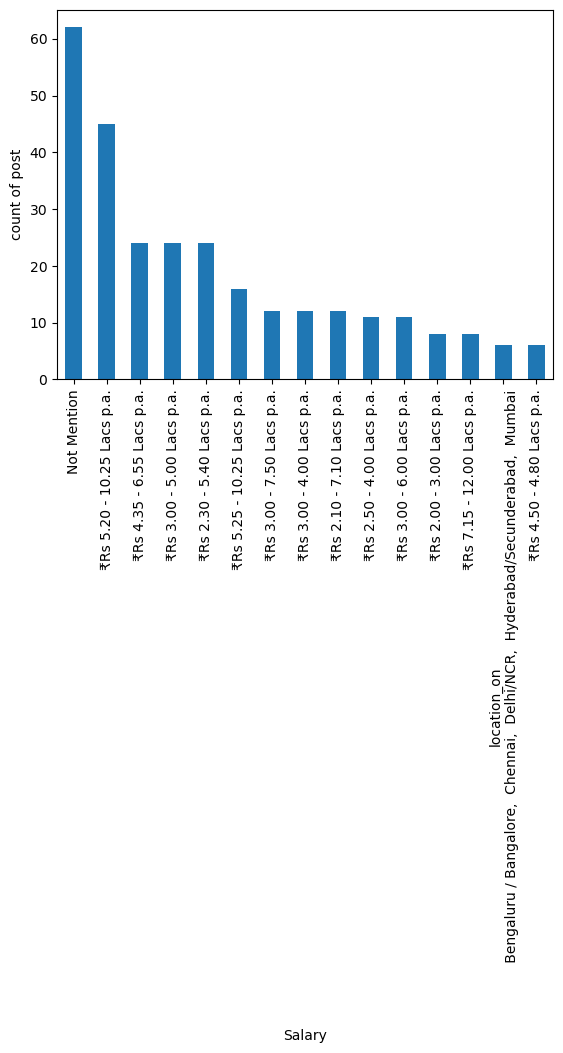

In [214]:
data['Salary'].value_counts().head(15).plot.bar() # Top 10 Times of the day at which the most number of messages were sent
plt.ylabel('count of post')
plt.xlabel('Salary')

In [215]:
data=data[['Description']]
data

,Description
0,Consulting with patients to understand their h...
1,"To support our rapid growth, CoolSys Energy De..."
2,Minimum Requirements:8 years of progressive ex...
3,Job DescriptionSenior Architect To lead the de...
4,Reporting Relationships:The successful candida...
...,...
490,Domain Supply Chain Manager Experience ...
491,JDThey are responsible for the daily managemen...
492,You should be able to act as a Single point of...
493,- Experience in NLP packagesRequired Skills :-...


In [216]:
data.iloc[6,0]

'Job DescriptionICG is searching for a Senior Quantity Surveyor. with some previous experience in the Airport . It is anticipated that the applicant will have at least10 years ...'

In [217]:
data.iloc[4,0]

'Reporting Relationships:The successful candidate will report to the Technical Manager and work closely with the facility manager and staff to solve technical problems, deliver...'

In [218]:
# Data Cleaning

In [219]:
from nltk.corpus import stopwords
import string
string.punctuation
repalce_space = re.compile('[/(){}\[\]\|@,;]')
#remove_bad_number = re.compile('['\d+']')
remove_bad_symbols = re.compile('[^0-9a-z #+_]')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    #lowercase text
    text = text.lower() 
    # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = repalce_space.sub(' ', text)
    # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = remove_bad_symbols.sub('', text)
    # Remove numbers
    #text = text.replace('\D+','') 
    # Remove URL
    text = text.replace(r'http\S+|www.\S+','')
    
    # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in stop_words) 
    # Remove Punctuation
    text ="".join([c for c in text if c not in string.punctuation])
   

    return text


In [220]:
data['Description']=data['Description'].apply(clean_text)

In [221]:
data.head()

,Description
0,consulting patients understand health concerns...
1,support rapid growth coolsys energy design sea...
2,minimum requirements8 years progressive experi...
3,job descriptionsenior architect lead design te...
4,reporting relationshipsthe successful candidat...


In [222]:
# Remove Numebrs

In [223]:
data= data.replace('\d+','',regex=True)
data.head(2)

,Description
0,consulting patients understand health concerns...
1,support rapid growth coolsys energy design sea...


# Lemmatization

In [224]:
from nltk.stem import WordNetLemmatizer
import nltk
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") ## v = verb   = arrest
            for w in w_tokenizer.tokenize(abc)]  # word tokenizer  w = arresting

In [225]:
data['Description'] = pd.DataFrame(data.Description.apply(lambda x :' '.join(lemmatize_text(x)))) 
data.head(2)

,Description
0,consult patients understand health concernswri...
1,support rapid growth coolsys energy design sea...


# Sentiment Analysis

In [226]:
data.head(3)

,Description
0,consult patients understand health concernswri...
1,support rapid growth coolsys energy design sea...
2,minimum requirements years progressive experie...


In [227]:
 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
data['compound'] = [analyzer.polarity_scores(x)['compound'] for x in data['Description']]
data['neg'] = [analyzer.polarity_scores(x)['neg'] for x in data['Description']]
data['neu'] = [analyzer.polarity_scores(x)['neu'] for x in data['Description']]
data['pos'] = [analyzer.polarity_scores(x)['pos'] for x in data['Description']]

from textblob import TextBlob
data['polarity'] = data['Description'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1
data.head(5)

In [228]:
#data['Sentiment'] = np.where(data['compound']>= 0.5, 'Positive', 'Negative')
data['Sentiment']=np.where(data['compound']>= 0.5, 'Positive', 
         (np.where(data['compound'] < 0,'Negative' ,'Neutral')))
data.head(10)

,Description,compound,neg,neu,pos,Sentiment
0,consult patients understand health concernswri...,0.0000,0.000,1.000,0.000,Neutral
1,support rapid growth coolsys energy design sea...,0.8225,0.000,0.575,0.425,Positive
2,minimum requirements years progressive experie...,0.5106,0.000,0.820,0.180,Positive
3,job descriptionsenior architect lead design te...,0.0000,0.000,1.000,0.000,Neutral
4,report relationshipsthe successful candidate r...,0.4404,0.127,0.610,0.263,Neutral
5,job description responsibilitiesthe part distr...,0.0000,0.000,1.000,0.000,Neutral
6,job descriptionicg search senior quantity surv...,0.0000,0.000,1.000,0.000,Neutral
7,responsibilitiescoordinate task accord priorit...,0.0000,0.000,1.000,0.000,Neutral
8,role expectationsthis role require application...,-0.0772,0.080,0.920,0.000,Negative
9,job descriptionrenardet search lead mechanical...,0.0000,0.000,1.000,0.000,Neutral


In [229]:
data=data.iloc[:,[0,5]]

In [230]:
data.head()

,Description,Sentiment
0,consult patients understand health concernswri...,Neutral
1,support rapid growth coolsys energy design sea...,Positive
2,minimum requirements years progressive experie...,Positive
3,job descriptionsenior architect lead design te...,Neutral
4,report relationshipsthe successful candidate r...,Neutral


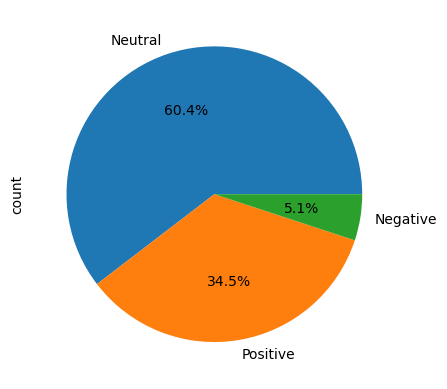

In [231]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

In [232]:
Positive_sent = data[data['Sentiment']=='Positive']
Negative_sent = data[data['Sentiment']=='Negative']
Neutral_sent = data[data['Sentiment']=='Neutral']

In [233]:
print('Number of Positive sentiment', Positive_sent['Sentiment'].count())
print('Number of Negative sentiment', Negative_sent['Sentiment'].count())
print('Number of Neutral sentiment', Neutral_sent['Sentiment'].count())

Number of Positive sentiment 171
Number of Negative sentiment 25
Number of Neutral sentiment 299


# Document-Term Matrix

In [234]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data['Description'])  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # document term matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,485,486,487,488,489,490,491,492,493,494
aana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
aboveage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abreast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,486,487,488,489,490,491,492,493,494,freq
aana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
abap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,6
aboveage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abreast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [236]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,486,487,488,489,490,491,492,493,494,freq
0,aana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,abap,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,able,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,6
3,aboveage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,abreast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [237]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
872,job,179
1462,sales,178
589,experience,135
1460,salary,134
60,airport,131
...,...,...
765,imagery,1
764,iimonitors,1
758,iapplications,1
757,hyderabadthe,1


In [238]:
w = tdm1[tdm1['freq'] >70]
print("Most Important Words Frequncy wise :\n")
w

Most Important Words Frequncy wise :



,Word,freq
872,job,179
1462,sales,178
589,experience,135
1460,salary,134
60,airport,131
735,hire,95
58,air,89
1642,team,88
1675,ticket,82
215,candidates,79


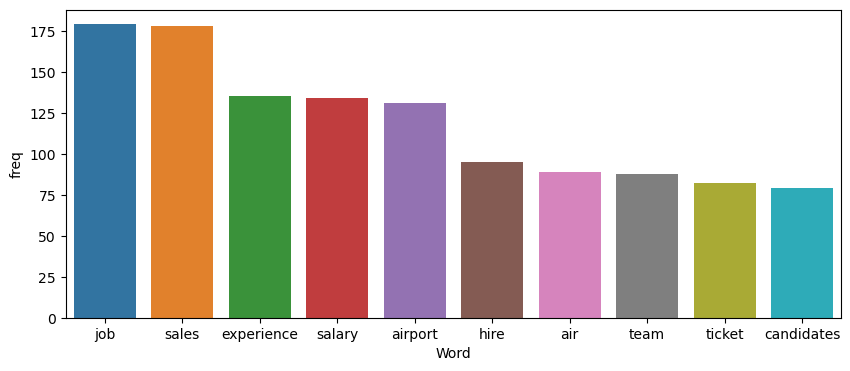

In [239]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 4))
fg = sns.barplot(x='Word', y='freq',data=w)


In [240]:
import plotly.express as px
import plotly.figure_factory as ff
fig = px.treemap(w, path=['Word'], values='freq',title='Tree of Most Common Words')
fig.show()


# TF-IDF

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True,stop_words='english',analyzer='word') 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data.Description)
feature_names = cv.get_feature_names_out()  ## EVERY WORD NAME
abc=tfidf_vectorizer_vectors.transpose()

In [242]:
output=pd.DataFrame.sparse.from_spmatrix(abc,index=feature_names)
output.reset_index(inplace=True)
output.rename(columns = {'index':'Word'}, inplace = True) # RENAMING
output

,Word,0,1,2,3,4,5,6,7,8,...,485,486,487,488,489,490,491,492,493,494
0,aana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,abap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.262569,0.0,0.0,0.247758,0.0,0.0
3,aboveage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,abreast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,yrsjob,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1822,yrspostcol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1823,zealand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1824,zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [243]:
output['TF*IDF'] = output.drop(['Word'],axis=1).max(axis=1) 

In [244]:
output=output[["Word","TF*IDF"]] #SUBSET OF 2 COLUMNS
output.sort_values(by='TF*IDF',ascending=False,inplace=True) # SORTING DATA 
output.head(20)

,Word,TF*IDF
1664,test,0.729228
1673,thingworx,0.690005
307,coms,0.684901
1699,travel,0.683128
443,design,0.675147
153,bank,0.666572
101,arcgis,0.658818
254,client,0.625595
1676,time,0.613697
1663,territory,0.597783


# Cosine Similarity

In [245]:
times.head(2)

,Title,Company,Experience,Salary,Location,Posted Date,Keyskills,Description,URL
0,\n Ophthalmology - Senior Resident & Assi...,\n Rachana Corporate Services Pvt.Ltd\n ...,0 - 3 yrs,₹Rs 15.00 - 18.00 Lacs p.a.,Other City(s) in Uttar Pradesh,2024-01-03,Ophthalmologist,Consulting with patients to understand their h...,https://www.timesjobs.com/job-detail/ophthalmo...
1,\n CANADA Project Required HVAC Engineer,\n IRANIAN CONSTRUCTION GROUP\n (More J...,7 - 12 yrs,₹Rs 18.00 - 27.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,HVAC Engineer,"To support our rapid growth, CoolSys Energy De...",https://www.timesjobs.com/job-detail/canada-pr...


In [246]:
data_cosine=times
data_cosine.head(3)

,Title,Company,Experience,Salary,Location,Posted Date,Keyskills,Description,URL
0,\n Ophthalmology - Senior Resident & Assi...,\n Rachana Corporate Services Pvt.Ltd\n ...,0 - 3 yrs,₹Rs 15.00 - 18.00 Lacs p.a.,Other City(s) in Uttar Pradesh,2024-01-03,Ophthalmologist,Consulting with patients to understand their h...,https://www.timesjobs.com/job-detail/ophthalmo...
1,\n CANADA Project Required HVAC Engineer,\n IRANIAN CONSTRUCTION GROUP\n (More J...,7 - 12 yrs,₹Rs 18.00 - 27.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,HVAC Engineer,"To support our rapid growth, CoolSys Energy De...",https://www.timesjobs.com/job-detail/canada-pr...
2,\n CANADA Project Required Senior Project...,\n IRANIAN CONSTRUCTION GROUP\n (More J...,12 - 17 yrs,₹Rs 26.00 - 33.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,Project Engineer,Minimum Requirements:8 years of progressive ex...,https://www.timesjobs.com/job-detail/canada-pr...


In [247]:
data_cosine['text']=data_cosine['Title']+data_cosine['Location']+data_cosine['Description']

In [248]:
#data_cosine=data_cosine.drop(columns=['Title','Location','Description'])
data_cosine.head(3)

,Title,Company,Experience,Salary,Location,Posted Date,Keyskills,Description,URL,text
0,\n Ophthalmology - Senior Resident & Assi...,\n Rachana Corporate Services Pvt.Ltd\n ...,0 - 3 yrs,₹Rs 15.00 - 18.00 Lacs p.a.,Other City(s) in Uttar Pradesh,2024-01-03,Ophthalmologist,Consulting with patients to understand their h...,https://www.timesjobs.com/job-detail/ophthalmo...,\n Ophthalmology - Senior Resident & Assi...
1,\n CANADA Project Required HVAC Engineer,\n IRANIAN CONSTRUCTION GROUP\n (More J...,7 - 12 yrs,₹Rs 18.00 - 27.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,HVAC Engineer,"To support our rapid growth, CoolSys Energy De...",https://www.timesjobs.com/job-detail/canada-pr...,\n CANADA Project Required HVAC EngineerB...
2,\n CANADA Project Required Senior Project...,\n IRANIAN CONSTRUCTION GROUP\n (More J...,12 - 17 yrs,₹Rs 26.00 - 33.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,Project Engineer,Minimum Requirements:8 years of progressive ex...,https://www.timesjobs.com/job-detail/canada-pr...,\n CANADA Project Required Senior Project...


In [249]:
data_cosine['text']=data_cosine['text'].str.lower()

In [250]:
data_cosine.head(2)

,Title,Company,Experience,Salary,Location,Posted Date,Keyskills,Description,URL,text
0,\n Ophthalmology - Senior Resident & Assi...,\n Rachana Corporate Services Pvt.Ltd\n ...,0 - 3 yrs,₹Rs 15.00 - 18.00 Lacs p.a.,Other City(s) in Uttar Pradesh,2024-01-03,Ophthalmologist,Consulting with patients to understand their h...,https://www.timesjobs.com/job-detail/ophthalmo...,\n ophthalmology - senior resident & assi...
1,\n CANADA Project Required HVAC Engineer,\n IRANIAN CONSTRUCTION GROUP\n (More J...,7 - 12 yrs,₹Rs 18.00 - 27.00 Lacs p.a.,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",2024-01-03,HVAC Engineer,"To support our rapid growth, CoolSys Energy De...",https://www.timesjobs.com/job-detail/canada-pr...,\n canada project required hvac engineerb...


In [251]:
from sklearn.metrics.pairwise import cosine_similarity
data_1= cv.fit_transform(data_cosine['text']) 
data_dtm1 = pd.DataFrame(data_1.toarray(), columns=cv.get_feature_names_out()) 

In [252]:
data_dtm1.shape

(495, 2951)

In [253]:
similarity = cosine_similarity(data_dtm1)

In [254]:
similarity

array([[1.        , 0.        , 0.0412393 , ..., 0.04279605, 0.04052204,
        0.        ],
       [0.        , 1.        , 0.29169168, ..., 0.03363364, 0.06369298,
        0.11128298],
       [0.0412393 , 0.29169168, 1.        , ..., 0.03706247, 0.14037248,
        0.0919709 ],
       ...,
       [0.04279605, 0.03363364, 0.03706247, ..., 1.        , 0.        ,
        0.06362848],
       [0.04052204, 0.06369298, 0.14037248, ..., 0.        , 1.        ,
        0.18074257],
       [0.        , 0.11128298, 0.0919709 , ..., 0.06362848, 0.18074257,
        1.        ]])

In [255]:
data_cosine[data_cosine['Keyskills'] == 'Project Engineer'].index[0]

2

In [256]:
def recommend(skills):
    index =data_cosine[data_cosine['Keyskills'] == skills].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:4]:
        print(data_cosine.iloc[i[0]].text)
       

In [257]:
recommend('Plant Engineer')


      project manager (work from home)bengaluru / bangalore,  chennai,  gurgaonas a project manager in a saas startup, your primary responsibility is to plan, execute, and oversee various projects within the organization while coordinating with the team ...

      canada project required piping engineerbengaluru / bangalore,  chennai,  hyderabad/secunderabad,  pune,  canadaresponsibilities:responsible for fel deliverables required to supply a quality engineering design package to the engineering design team.performing pipe stress / flexibility a...

      canada project required oil & gas engineerbengaluru / bangalore,  chennai,  hyderabad/secunderabad,  pune,  canadarole expectations:this role requires the application of standard engineering techniques, procedures and criteria on job assignments.we strive to be known for unmatched quality...


In [258]:
recommend('Senior Architect')


      canada project required piping engineerbengaluru / bangalore,  chennai,  hyderabad/secunderabad,  pune,  canadaresponsibilities:responsible for fel deliverables required to supply a quality engineering design package to the engineering design team.performing pipe stress / flexibility a...

      canada project required hvac engineerbengaluru / bangalore,  chennai,  hyderabad/secunderabad,  pune,  canadato support our rapid growth, coolsys energy design is in search of an hvac design engineer to join our princeton team!in this role, the engineer/designer will:preparation and ...

      canada projects require electrical engineerbengaluru / bangalore,  chennai,  hyderabad/secunderabad,  pune,  canadaduties & responsibilitiesdesigning, implementing, maintaining, and improving electrical design, products and systems.collaborate with other engineers to design, and develo...


# Data Visualization

<Axes: xlabel='count', ylabel='Keyskills'>

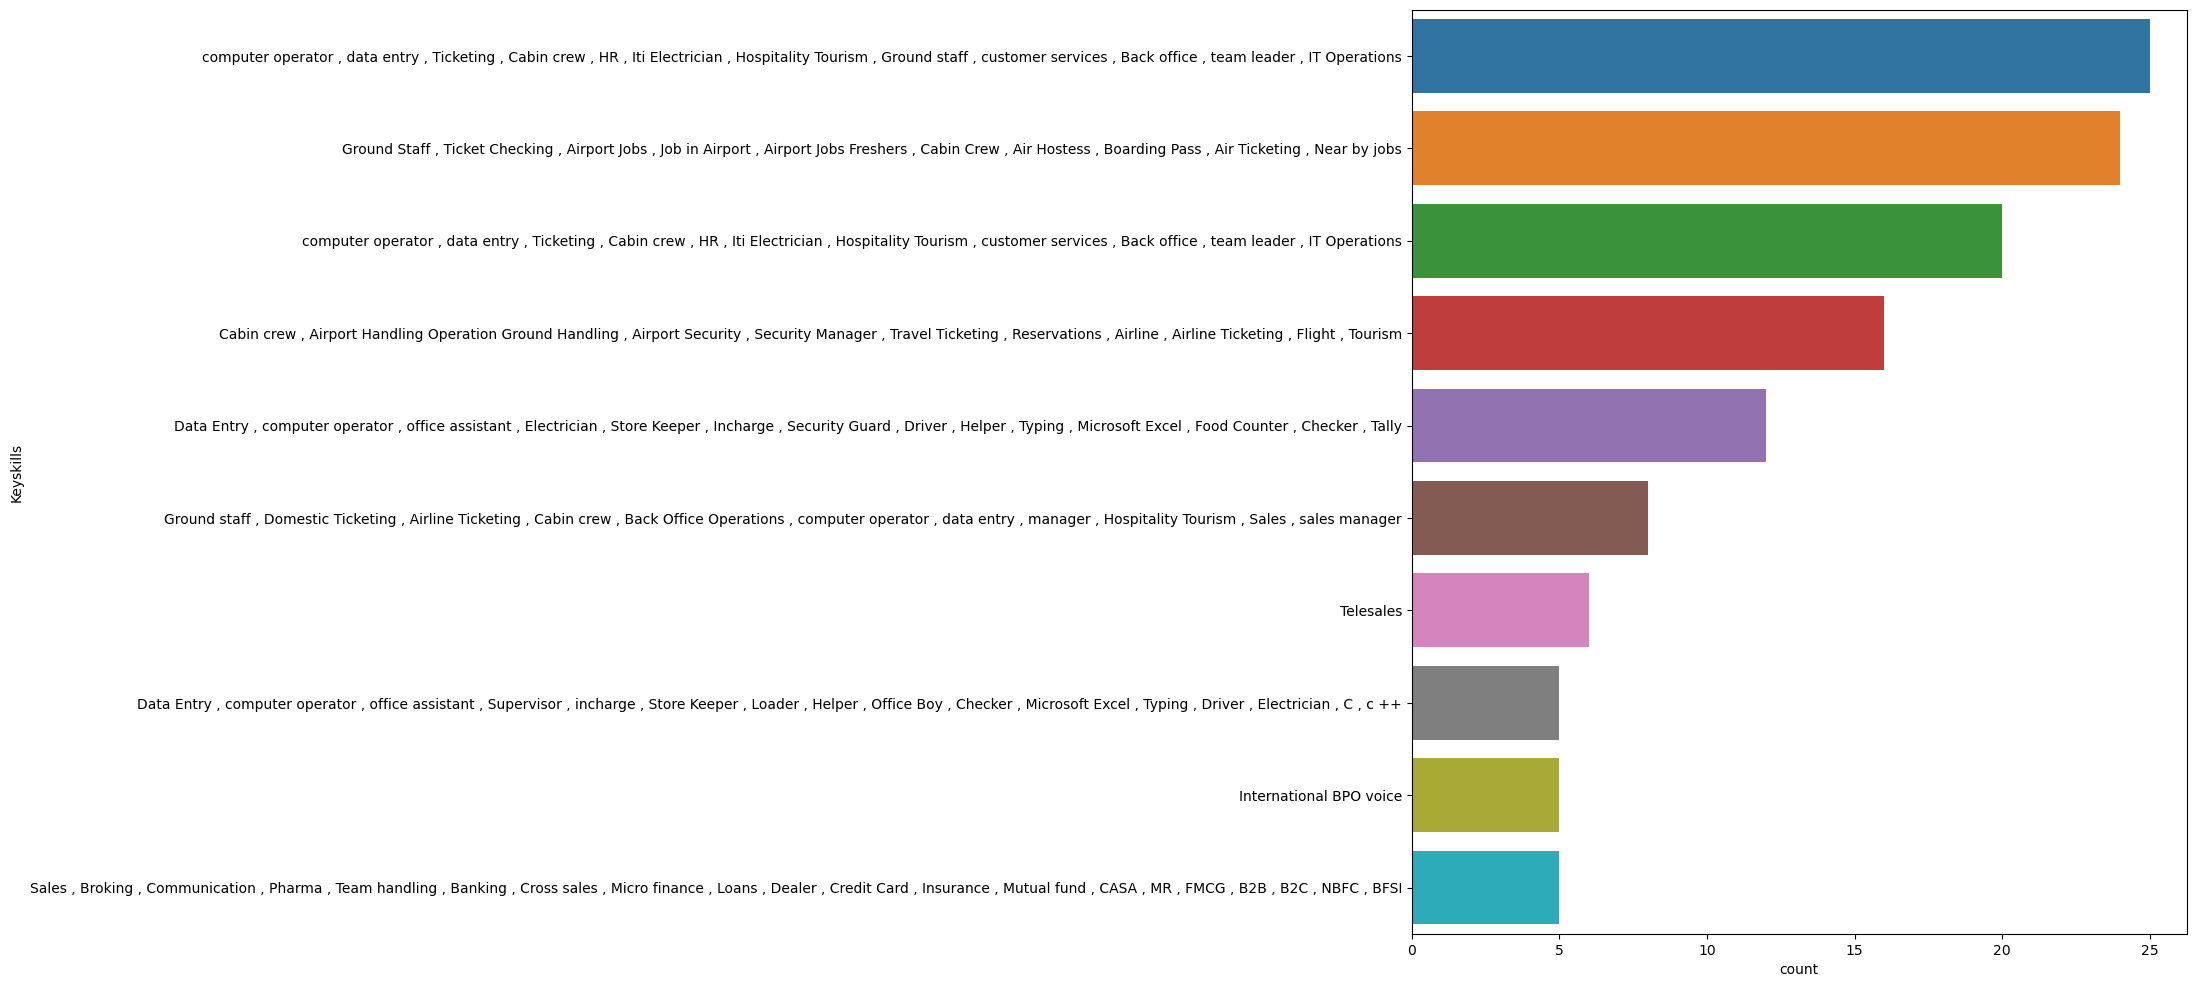

In [259]:
order = data_cosine.Keyskills.value_counts().head(10).index
plt.figure(figsize=(10, 12))
sns.countplot(data=times, y='Keyskills', order=order)

Text(0.5, 0, 'Name of location')

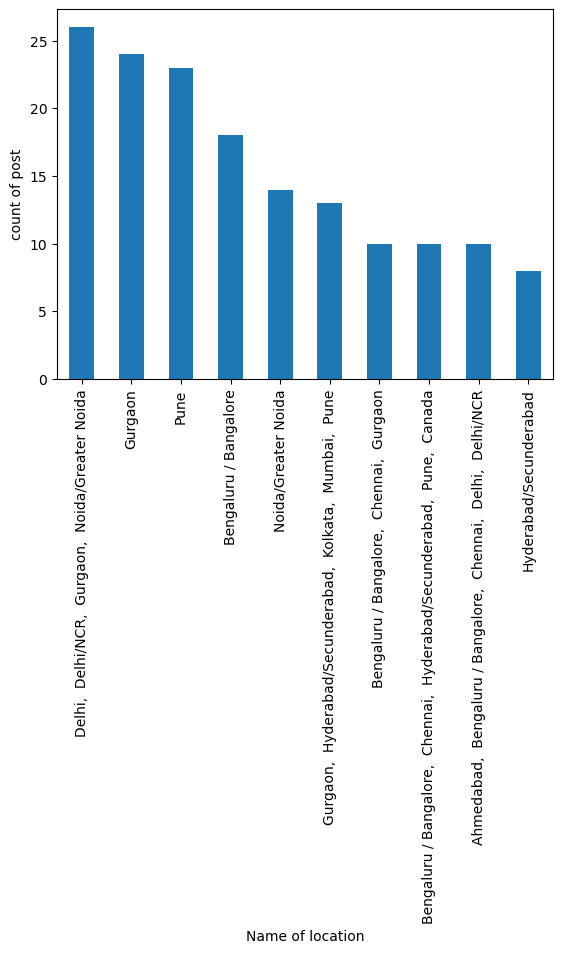

In [260]:
times['Location'].value_counts().head(10).plot.bar() # Top 10 Times of the day at which the most number of messages were sent
plt.ylabel('count of post')
plt.xlabel('Name of location')

<Axes: xlabel='count', ylabel='Posted Date'>

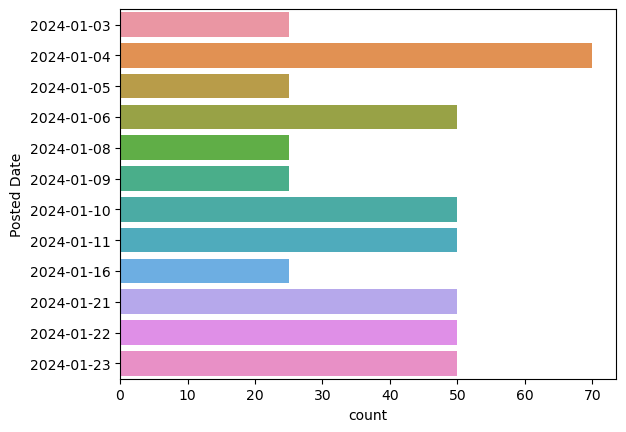

In [261]:
sns.countplot(data=times,y=times['Posted Date'])

# Generate Word Cloud

In [262]:
text = " ".join(review for review in data.Description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 68108 words in the combination of all review.


In [263]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
stop_word = set(STOPWORDS)


def generate_wordcloud(text,title = None): 
    
    #Creating wordcloud object and getting list of frequent words from text
    wordcloud = WordCloud(background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          scale=3,
                          stopwords = stop_word,).generate(text)
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
   
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()

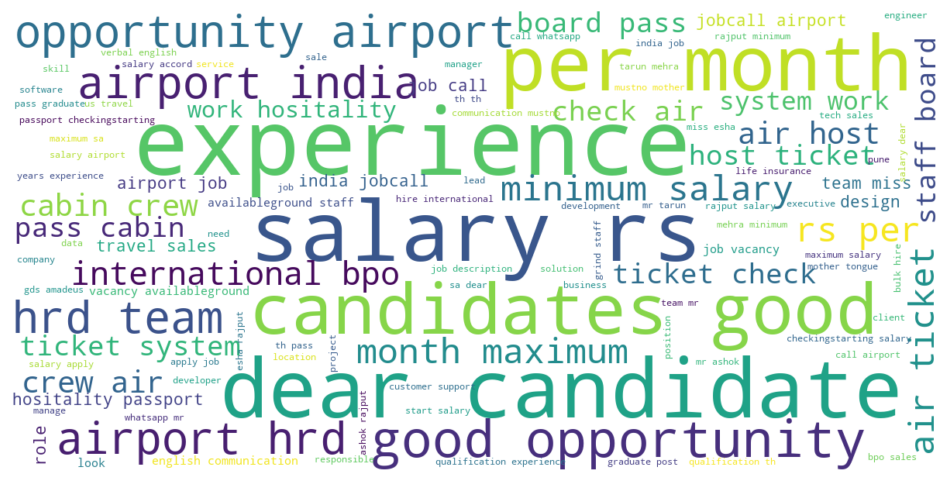

In [264]:
generate_wordcloud(text)

In [265]:
# Word Cloud For Positive Sentiment

In [266]:
PositiveText = " ".join(review for review in Positive_sent.Description)
print ("There are {} words in the combination of all review.".format(len(PositiveText)))

There are 23207 words in the combination of all review.


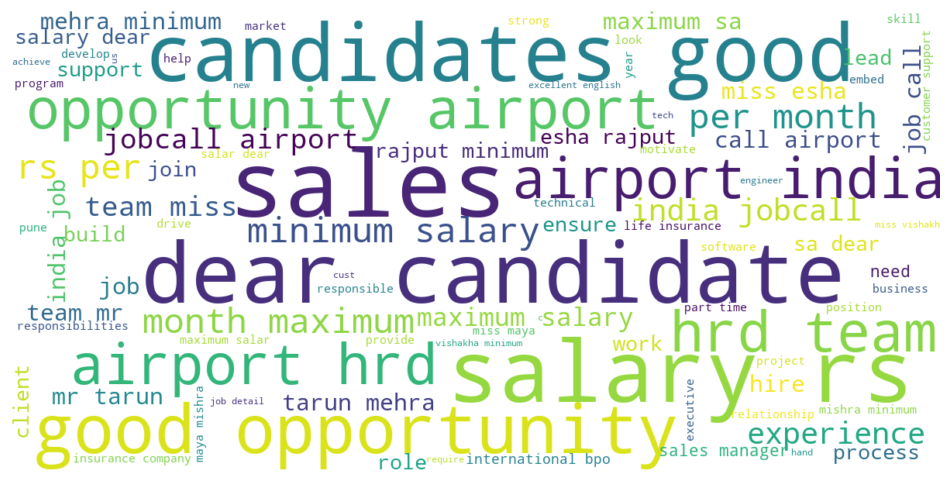

In [267]:
generate_wordcloud(PositiveText)

In [268]:
negativeText = " ".join(review for review in Negative_sent.Description)
print ("There are {} words in the combination of all review.".format(len(negativeText)))

There are 3642 words in the combination of all review.


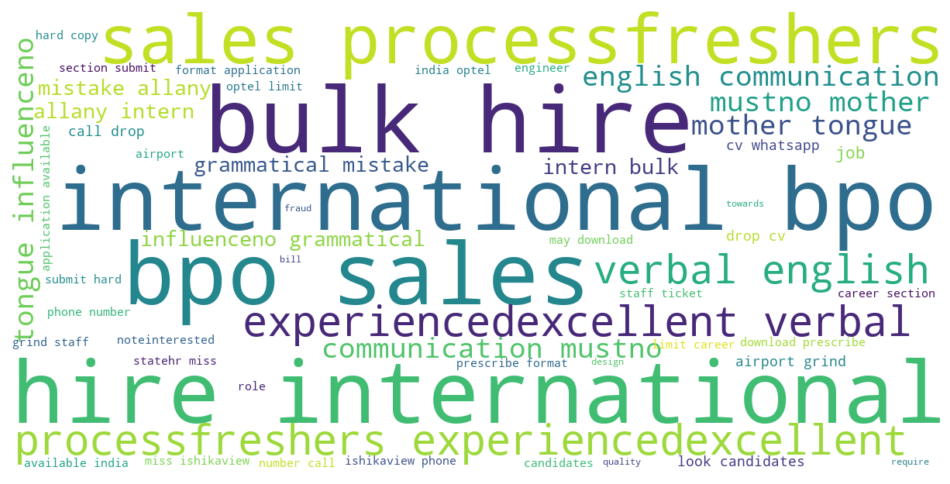

In [269]:
generate_wordcloud(negativeText)

In [270]:
neutralText = " ".join(review for review in Neutral_sent.Description)
print ("There are {} words in the combination of all review.".format(len(neutralText)))

There are 41257 words in the combination of all review.


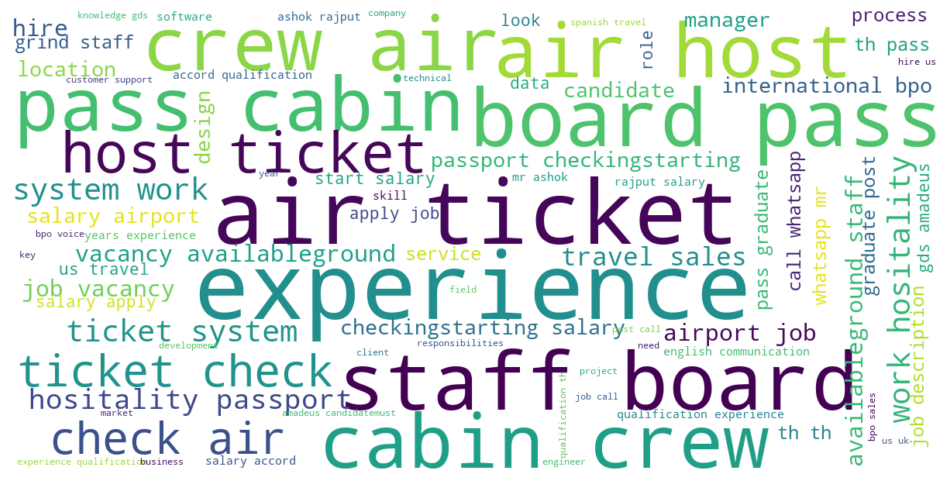

In [271]:
generate_wordcloud(neutralText)

# Tokenizing the words

In [272]:
# The maximum number of words to be used. (most frequent)
max_no_words = 25000
# Max number of words in each sentance.
max_seq_len = 250
# Create tokenizer object
tokenizer = Tokenizer(num_words=max_no_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# Fit the tokenizer on text data
tokenizer.fit_on_texts(data['Description'].values)
# Count how many unique tokes are in these observations
word_index = tokenizer.word_index
print('================================\nNumber of unique tokens %s \n================================' % len(word_index))

Number of unique tokens 1899 


In [273]:
# Text to sequences 
X = tokenizer.texts_to_sequences(data['Description'].values)

# Padding the sequences
X = pad_sequences(X, maxlen=max_seq_len)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (495, 250)


In [274]:
# Create dummies variables for output variable
Y = pd.get_dummies(data['Sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (495, 3)


In [275]:
y=data[['Sentiment']]
y.head()

,Sentiment
0,Neutral
1,Positive
2,Positive
3,Neutral
4,Neutral


# Naive Bayes Machine Learning Model

In [276]:
from sklearn.preprocessing import LabelEncoder
y=  y.apply(LabelEncoder().fit_transform)
y.head(3)

,Sentiment
0,1
1,2
2,2


In [277]:
data_dtm['Sentiment']=y['Sentiment']
data_dtm.head(2)

,aana,abap,able,aboveage,abreast,acc,accelerate,accom,accord,account,...,yerawada,youre,yr,yrs,yrsjob,yrspostcol,zealand,zero,zinc,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [278]:
from sklearn.model_selection import train_test_split

train_x = data_dtm.drop(['Sentiment'],axis=1)
train_y = data_dtm['Sentiment']

X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.3,random_state=23)

In [279]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(346, 1826) (346,)
(149, 1826) (149,)


In [280]:
from sklearn.naive_bayes import MultinomialNB

Naivemodel = MultinomialNB(alpha=1)  # Laplace smoothing (alpha) = 0 
Naivemodel.fit(X_train, y_train)

MultinomialNB(alpha=1)

# Prediction On Train

In [281]:
train = pd.concat([X_train,y_train],axis=1)
train.head(2)

,aana,abap,able,aboveage,abreast,acc,accelerate,accom,accord,account,...,yerawada,youre,yr,yrs,yrsjob,yrspostcol,zealand,zero,zinc,Sentiment
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [282]:
train['Probability'] = Naivemodel.predict_proba(X_train)[:,1]
train['Predicted'] = np.where(train['Probability'] >= 0.7,1,0)  #thershold  >0.7
train.head()

,aana,abap,able,aboveage,abreast,acc,accelerate,accom,accord,account,...,yr,yrs,yrsjob,yrspostcol,zealand,zero,zinc,Sentiment,Probability,Predicted
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.000000e+00,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.000000e+00,1
463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1.126843e-09,0
357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.000000e+00,1
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.000000e+00,1


# Model Performance Metrics - Train

In [303]:
from sklearn.metrics import classification_report,accuracy_score
labels = ['Negative','Neutral','Positive']
print(classification_report(train['Sentiment'], train['Predicted'],target_names=labels))

              precision    recall  f1-score   support

    Negative       0.14      1.00      0.25        20
     Neutral       0.99      0.99      0.99       209
    Positive       0.00      0.00      0.00       117

    accuracy                           0.65       346
   macro avg       0.38      0.66      0.41       346
weighted avg       0.61      0.65      0.61       346



In [284]:
print("==============================================")
print("Accuracy of Test Model : ",accuracy_score(train['Predicted'], train['Sentiment']))
print("==============================================\n")

Accuracy of Test Model :  0.653179190751445



# Prediction on Test

In [285]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,aana,abap,able,aboveage,abreast,acc,accelerate,accom,accord,account,...,yerawada,youre,yr,yrs,yrsjob,yrspostcol,zealand,zero,zinc,Sentiment
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [286]:
test['Probability'] = Naivemodel.predict_proba(X_test)[:,1]
test['Predicted'] = np.where(test['Probability'] >= 0.7,1,0)  #thershold  >0.7
test.head()

,aana,abap,able,aboveage,abreast,acc,accelerate,accom,accord,account,...,yr,yrs,yrsjob,yrspostcol,zealand,zero,zinc,Sentiment,Probability,Predicted
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,7.688625e-01,1
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.000000e+00,1
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.676753e-07,0
481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,5.662227e-02,0
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,9.999996e-01,1


# Model Performance Metrics - Test

In [304]:
from sklearn.metrics import classification_report
labels = ['Negative','Neutral','Positive']
print(classification_report(test['Sentiment'], test['Predicted'],target_names=labels))

              precision    recall  f1-score   support

    Negative       0.05      0.80      0.09         5
     Neutral       0.92      0.68      0.78        90
    Positive       0.00      0.00      0.00        54

    accuracy                           0.44       149
   macro avg       0.32      0.49      0.29       149
weighted avg       0.56      0.44      0.48       149



In [288]:
print("=============================================")
print("Accuracy of Test Model : ",accuracy_score(test['Predicted'], test['Sentiment']))
print("=============================================\n")

Accuracy of Test Model :  0.436241610738255



# Model development with simple RNN

# Data Partition

In [289]:
#Traning and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(346, 250) (346, 3)
(149, 250) (149, 3)


# Creating Model

In [290]:
#Create sequential object
model = Sequential()
#Embedding layer
model.add(Embedding(max_no_words, 100, input_length=X.shape[1]))
#Dropout layer
model.add(SpatialDropout1D(0.3))
#RNN layer
model.add(LSTM(100, input_shape = (346,250), return_sequences = False))
#Fully connected layer
model.add(Dense(3))
model.add(Activation('softmax'))


In [291]:
# Optimizer 
adam = optimizers.Adam(lr = 0.001)
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [292]:
history = model.fit(X_train, Y_train,epochs = 10, batch_size = 25, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 5s 198ms/step - loss: 1.0119 - accuracy: 0.5870 - val_loss: 1.1915 - val_accuracy: 0.5286
Epoch 2/10
12/12 [==============================] - 2s 148ms/step - loss: 0.8680 - accuracy: 0.6377 - val_loss: 0.8030 - val_accuracy: 0.6571
Epoch 3/10
12/12 [==============================] - 2s 136ms/step - loss: 0.7563 - accuracy: 0.6594 - val_loss: 0.7944 - val_accuracy: 0.5286
Epoch 4/10
12/12 [==============================] - 1s 125ms/step - loss: 0.6508 - accuracy: 0.7283 - val_loss: 0.6709 - val_accuracy: 0.7429
Epoch 5/10
12/12 [==============================] - 1s 125ms/step - loss: 0.4974 - accuracy: 0.8949 - val_loss: 0.5656 - val_accuracy: 0.7143
Epoch 6/10
12/12 [==============================] - 1s 124ms/step - loss: 0.2477 - accuracy: 0.9384 - val_loss: 0.4800 - val_accuracy: 0.7714
Epoch 7/10
12/12 [==============================] - 1s 124ms/step - loss: 0.1054 - accuracy: 0.9819 - val_loss: 0.5061 - val_accuracy: 0.7571
Epoch 

In [293]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          2500000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 250, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 2580703 (9.84 MB)
Trainable params: 2580703 (9.84 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [294]:
# Save the model
model.save('model_rnn.h5')

# Testing the model

In [295]:
accuracy = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy [0],accuracy [1]))

5/5 [==============================] - 0s 38ms/step - loss: 0.4438 - accuracy: 0.8322
Test set
  Loss: 0.444
  Accuracy: 0.832


In [296]:
y_pred = model.predict(X_test)

5/5 [==============================] - 1s 39ms/step


In [297]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(Y_test, axis = 1)
print(accuracy_score(y_pred, y_test))

print(confusion_matrix(y_test, y_pred))

5/5 [==============================] - 0s 47ms/step
0.8322147651006712
[[ 7  2  0]
 [ 0 78 10]
 [ 0 13 39]]


In [305]:
from sklearn.metrics import classification_report
labels = ['Negative','Neutral','Positive']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       1.00      0.78      0.88         9
     Neutral       0.84      0.89      0.86        88
    Positive       0.80      0.75      0.77        52

    accuracy                           0.83       149
   macro avg       0.88      0.80      0.84       149
weighted avg       0.83      0.83      0.83       149



 # Accuraction of model is 83 % which is good fit model

# Visualizing "Loss" and "Accuracy" on each epoch

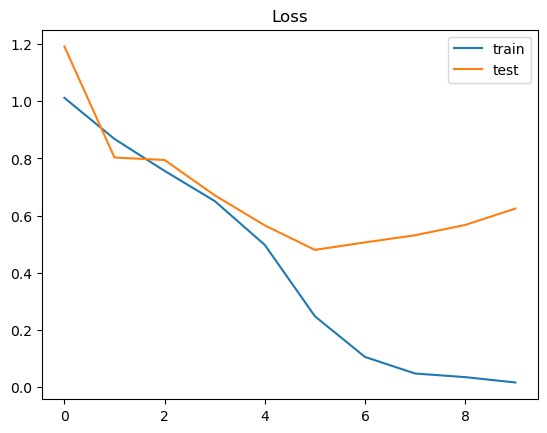

In [299]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

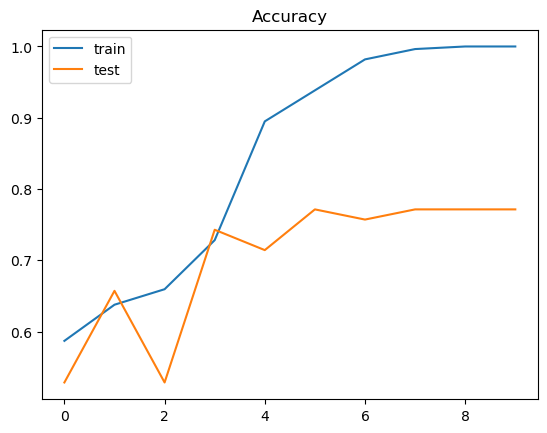

In [300]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Import Model

In [301]:
import pickle
pickle.dump(model, open(r"C:\Users\TRUPTI\Desktop\Trupti_CP_2\CloudDeployAWS\build.pkl",'wb'))  # Exporting model from python to laptop

In [302]:
# cosine data model
pickle.dump(data_cosine,open(r'C:\Users\TRUPTI\Desktop\Trupti_CP_2\CloudDeployAWS\data_list.pkl','wb'))
pickle.dump(similarity,open(r'C:\Users\TRUPTI\Desktop\Trupti_CP_2\CloudDeployAWS\similarity.pkl','wb'))